In [ ]:

'''problem statement -
BUILD AND VISUALIZE A DECISION TREE MODEL USING SCIKIT-LEARN TO CLASSIFY
OR PREDICT OUTCOMES ON A CHOSEN DATASET.

Title - Crop Yield Prediction
Objective-
To predict crop yield using agricultural parameters such as rainfall, fertilizer usage, temperature, and soil nutrients (N, P, K)
using a Decision Tree Regression model.'''


'problem statement -\nBUILD AND VISUALIZE A DECISION TREE MODEL USING SCIKIT-LEARN TO CLASSIFY\nOR PREDICT OUTCOMES ON A CHOSEN DATASET.\n# Crop Yield Prediction Decision Tree\n## Objective\n#To predict crop yield (Q/acre) using agricultural parameters such as\n#rainfall, fertilizer usage, temperature, and soil nutrients (N, P, K)\n#using a Decision Tree Regression model.'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_absolute_error ,mean_squared_error,r2_score

In [4]:
data = pd.read_excel("crop.xlsx")


In [5]:
#first few lines of data

data.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [6]:
#analysis of data

data.info()

#dataset contains agricultural features which are in float.. and temp is in object format 
#the target is yield (Q/acre).
#it does not have any categorical data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rain Fall (mm)  99 non-null     float64
 1   Fertilizer      99 non-null     float64
 2   Temperatue      100 non-null    object 
 3   Nitrogen (N)    99 non-null     float64
 4   Phosphorus (P)  99 non-null     float64
 5   Potassium (K)   99 non-null     float64
 6   Yeild (Q/acre)  99 non-null     float64
dtypes: float64(6), object(1)
memory usage: 6.1+ KB


In [7]:
data.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [8]:
#first we need to clean the data to remove missing values..to ensure model works correctly
#we will fill the missing values with mean values.

data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

data.isnull().sum()


Rain Fall (mm)    0
Fertilizer        0
Temperatue        0
Nitrogen (N)      0
Phosphorus (P)    0
Potassium (K)     0
Yeild (Q/acre)    0
dtype: int64

In [9]:
#now will perform feature selection and group the features together

X = data[['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)']]

y = data['Yeild (Q/acre)']


In [10]:
#splitting data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
model = DecisionTreeRegressor(
    max_depth=7,
    min_samples_split=10,
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#evaluating metrics

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)


MAE: 0.7509469696969698
MSE: 0.8524631680323644
R² Score: 0.5441634565408362


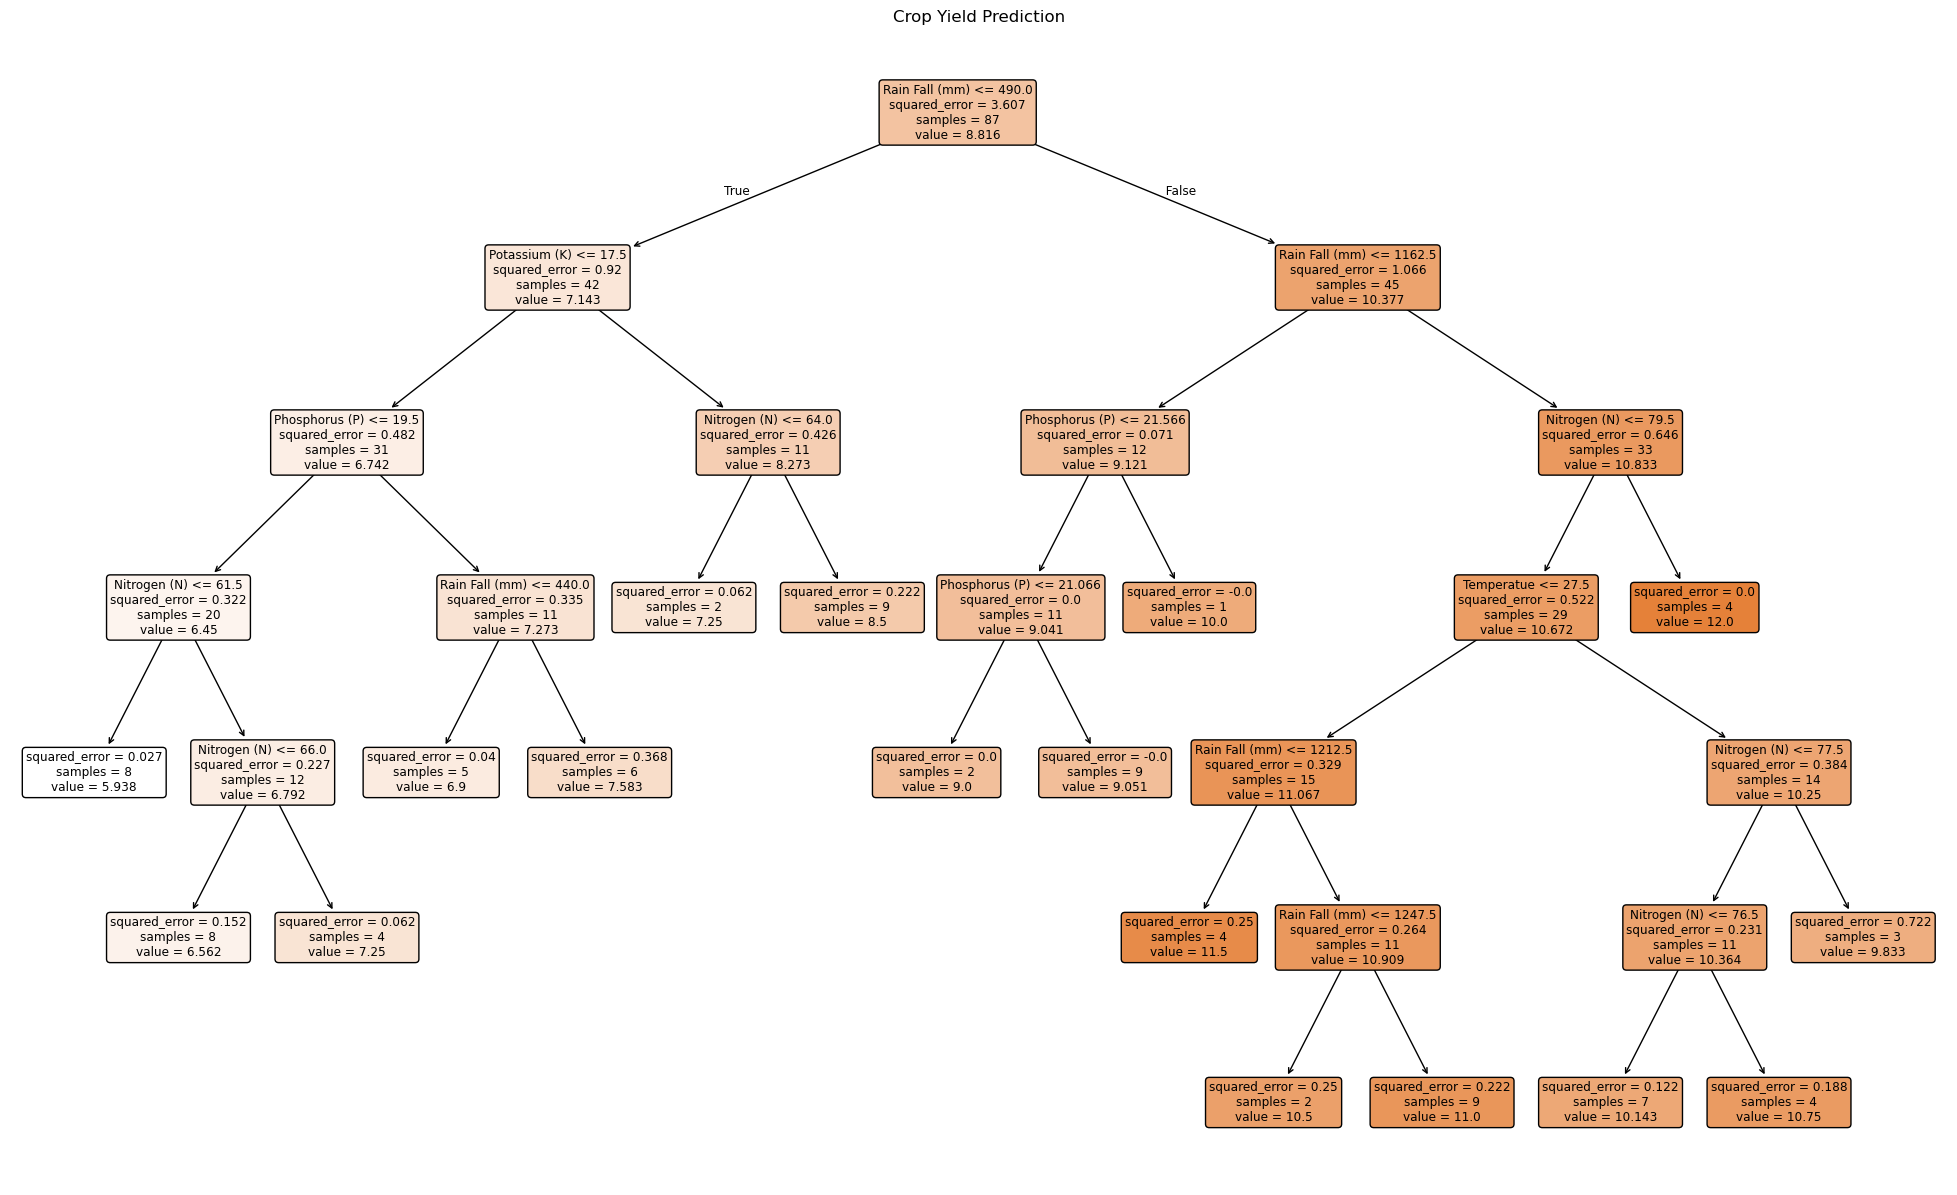

In [21]:
plt.figure(figsize=(25,15))
plot_tree(
    model,
    feature_names=X.columns,
    filled=True,
    rounded=True
)
plt.title("Crop Yield Prediction")
plt.show()


In [22]:
#prediction on new data

new_crop = pd.DataFrame(
    [[950, 134, 42, 39, 33, 45]],
    columns=X.columns
)

predicted_yield = model.predict(new_crop)
print("Predicted Yield (Q/acre):", predicted_yield[0])


Predicted Yield (Q/acre): 10.0


In [25]:
new_crop = pd.DataFrame(
    [[1200, 180, 27, 90, 60, 70]],
    columns=X.columns
)

predicted_yield = model.predict(new_crop)
print("Predicted Yield (Q/acre):", predicted_yield[0])


Predicted Yield (Q/acre): 12.0


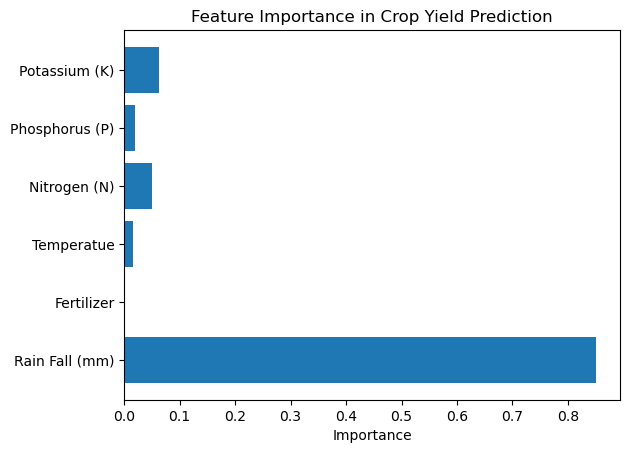

In [27]:
importances = model.feature_importances_

plt.figure()
plt.barh(X.columns, importances)
plt.xlabel("Importance")
plt.title("Feature Importance in Crop Yield Prediction")
plt.show()


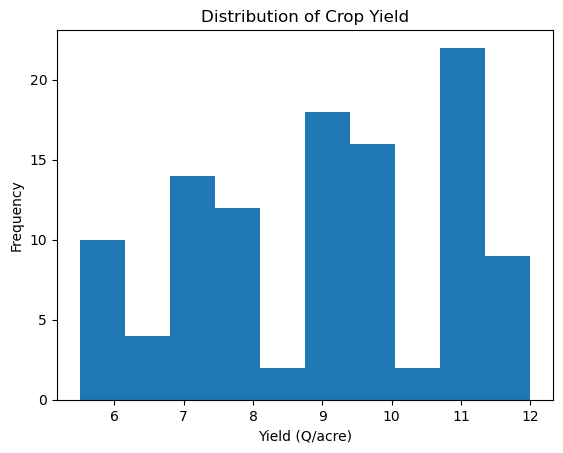

In [28]:
plt.figure()
plt.hist(y, bins=10)
plt.xlabel("Yield (Q/acre)")
plt.ylabel("Frequency")
plt.title("Distribution of Crop Yield")
plt.show()


In [29]:
#hence we successfully implemented a decision tree model using scikit-learn for a regression problem.
#using crop data we predicted yeild value.